## Простая линейная регрессия с использованием Sklearn

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Переопределим стили matplotlib по умолчанию на стили Seaborn
sns.set()

In [46]:
data = pd.read_csv('datasets/sat_gpa.csv')

In [47]:
data.sample(5)

,SAT,GPA
58,1781,3.47
70,1933,3.59
38,1777,3.37
80,1810,3.71
3,1685,2.74


In [48]:
x = data['SAT']
y = data['GPA']

In [49]:
x.shape, y.shape

((84,), (84,))

Чтобы использовать данные `x` в `sklearn`, они должны быть представлены в виде двумерного массива (матрицы). Для этого их нужно преобразовать методом `reshape(-1, 1)`. Обратите внимание, что это не понадобится, когда у нас будет более одного признака (т.к. входные данные будут по умолчанию представлены в виде двумерного массива).

In [50]:
# x_matrix = x.values.reshape(84, 1)
x_matrix = x.values.reshape(-1, 1)

In [51]:
x.head()

0    1714
1    1664
2    1760
3    1685
4    1693
Name: SAT, dtype: int64

In [52]:
x_matrix[:5]

array([[1714],
       [1664],
       [1760],
       [1685],
       [1693]])

In [53]:
x_matrix.shape

(84, 1)

### Регрессия 

Создадим объект линейной регрессии, который представлен классом LinearRegression в библиотеке sklearn. Затем метод `fit()` подбирает коэффициенты регрессии таким образом, чтобы минимизировать сумму квадратов ошибок между предсказанными и реальными значениями зависимых переменных.

В отличие от метода `OLS()` в Statsmodels, где аргументы передаются в обратном порядке (зависимые переменные сначала, а затем независимые), при использовании метода `fit()` в sklearn аргументы передаются в том же порядке, в котором они указаны в формуле линейной регрессии (сначала независимые, а затем зависимые).

In [54]:
reg = LinearRegression()
reg.fit(x_matrix, y)

LinearRegression()

После обучения модели линейной регрессии с помощью `fit()`, нам стали доступны следующие методы:

### Коэффициент детерминации (R-squared)

`reg.score(x, y)` используется для расчета коэффициента детерминации (R-squared) модели. Коэффициент детерминации - это мера соответствия модели исходным данным. Значение R-квадрат близко к 1 означает, что модель достаточно хорошо описывает данные.

In [55]:
reg.score(x_matrix, y)

0.40600391479679765

### Коэффициенты регрессии

`reg.coef_` возвращает массив коэффициентов регрессии, который содержит веса, назначенные каждому из признаков, представленных в матрице `x_matrix`. Обратите внимание, что метод возвращает нам массив, так как обычно мы ожидаем несколько коэффициентов (увидим в множественной регрессии).

In [56]:
reg.coef_

array([0.00165569])

### Свободный член (интерсепт)

`reg.intercept_` возвращает значение свободного члена.

In [57]:
reg.intercept_

0.275040299660279

### Предсказания

`reg.predict(n)` используется для предсказания значения зависимой переменной для нового значения независимой переменной `n`. Этот метод возвращает массив, так как можно предсказывать несколько значений одновременно.

In [58]:
reg.predict([[1450], [1750]])

array([2.67578797, 3.17249439])

Теперь будем предсказывать GPA на основе датафрейма, а не просто значений.

In [59]:
new_data = pd.DataFrame(data=[1700, 1770, 1800],columns=['SAT'])
new_data

,SAT
0,1700
1,1770
2,1800


In [88]:
reg.predict(new_data.values)

array([308.32812859, 281.6165835 ])

**Note:** Warning возникает, когда в модель линейной регрессии были переданы данные с именами признаков, но при обучении модели имена признаков не были указаны явно. Это происходит из-за того, что мы обучили модель с данными в DataFrame, а затем использовали только конкретные значения для предсказания. 

Это означает, что при использовании модели для предсказания результатов не будет доступно соответствие между именами признаков и их значениями, что может затруднить интерпретацию результатов.

[Обсуждение на StackOverflow](https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0)

In [61]:
new_data['Predicted_GPA'] = reg.predict(new_data.values)
new_data

,SAT,Predicted_GPA
0,1700,3.089710
1,1770,3.205608
2,1800,3.255279


### Иии визуализируем

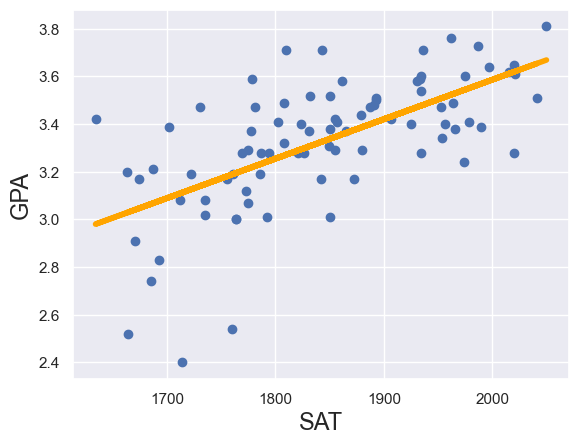

In [62]:
plt.scatter(x, y)

yhat = reg.coef_ * x_matrix + reg.intercept_
#yhat = 0.0017 * x + 0.275

fig = plt.plot(x, yhat, lw=4, c='orange', label='regression line')

plt.xlabel('SAT', fontsize = 17)
plt.ylabel('GPA', fontsize = 17)
plt.show()

## Множественная линейная регрессия в Sklearn

Сначала попробуем поэксперментировать добавив столбец рандомных чисел от 1 до 4, который вам знаком из прошлого раздела.

In [63]:
data['random_numbers'] = np.random.randint(1, 5, len(data))

In [64]:
data.sample(5)

,SAT,GPA,random_numbers
55,1887,3.47,4
29,1794,3.28,3
20,1761,3.19,1
1,1664,2.52,1
77,2020,3.65,2


Раздлим данные на зависимую и независимые переменные.

In [65]:
x = data.drop('GPA', axis=1)
y = data['GPA']

И обучим линейную регрессию уже привычным способом.

In [66]:
reg = LinearRegression()
reg.fit(x, y)

LinearRegression()

Посмотрим на коэффициенты и свободный член регрессии.

In [67]:
reg.coef_

array([0.00164902, 0.00549613])

In [68]:
reg.intercept_

0.2736751893709308

Вспомним, что когда мы обучали простую линейную регрессию, коэффициент признака SAT был `array([0.00165569])`, а интерсепт - `0.275`.  

### Отбор признаков

Импортируем модуль отбора признаков `f_regression` из sklearn. Он позволяет выбрать наиболее подходящие признаки для регрессии.

Затем вызываем функцию `f_regression(x, y)`, которая возвращает два массива: первый массив с F-статистиками для каждой регрессии, а второй массив - с p-значениями для каждого независимого признака. F-статистика показывает значимость каждого независимого признака для зависимой переменной.

In [69]:
from sklearn.feature_selection import f_regression

f_regression(x, y)

(array([56.04804786,  0.75179407]), array([7.19951844e-11, 3.88439005e-01]))

Будем использовать только второй массив. Запишем его в переменную `p_values`.

In [70]:
p_values = f_regression(x, y)[1]
p_values.round(3)

array([0.   , 0.388])

Создадим новый DataFrame `reg_summary`. Заполним его коэффициентами регрессии и округлёнными p-значениями.

In [71]:
reg_summary = pd.DataFrame(data = x.columns.values, columns=['Features'])
reg_summary

reg_summary['Coefficients'] = reg.coef_
reg_summary['p-values'] = p_values.round(3)

reg_summary

,Features,Coefficients,p-values
0,SAT,0.001649,0.000
1,random_numbers,0.005496,0.388


Полученная сводная таблица содержит информацию о каждом независимом признаке, его значимости и вкладе в модель. Она может помочь в принятии решения об использовании тех или иных признаков в модели.

## Масштабирование признаков

Если значения и их разбросы в одном признаке больше другого, то алгоритм автоматически решит, что этот признак важнее. Чтобы избежать этой проблемы, надо масштабировать признаки, то есть привести их к одному масштабу. Для этого мы будем использовать один из самых популярных и простых методов масштабирования — стандартизацию. 

Импортируем `StandardScaler` из sklearn модуля для преобработки.

In [72]:
from sklearn.preprocessing import StandardScaler

Создадим объект класса StandardScaler.

In [73]:
scaler = StandardScaler()

Обучаем скейлер на `x`. На этом этапе фактически мы просто вычисляем среднее значение и стандартное отклонение для каждой переменной в предоставленном наборе данных.

In [74]:
scaler.fit(x)

StandardScaler()

Саму стандартизацию выполняет метод `transform()`.

In [75]:
x_scaled = scaler.transform(x)

Результат - объект ndarray (многомерный массив).

In [76]:
x_scaled[:10]

array([[-1.26338288, -1.35717321],
       [-1.74458431, -1.35717321],
       [-0.82067757,  1.37888799],
       [-1.54247971,  0.46686759],
       [-1.46548748, -1.35717321],
       [-1.68684014, -0.44515281],
       [-0.78218146, -0.44515281],
       [-0.78218146,  0.46686759],
       [-0.51270866, -0.44515281],
       [ 0.04548499,  1.37888799]])

### Регрессия с масштабированными признаками

In [77]:
reg = LinearRegression()
reg.fit(x_scaled, y)

print('Коэффициенты (weights):', reg.coef_.round(3))
print('Свободный член (bias):', reg.intercept_.round(3))

Коэффициенты (weights): [0.171 0.006]
Свободный член (bias): 3.33


### Очередная сводная таблица

Создаём новый DataFrame. Будем называть коэффициенты весами (weights). Создаем столбец 'Weights' и заполняем его коэффициентами регрессии. 

In [82]:
reg_summary = pd.DataFrame([['Bias'], ['SAT'], ['random_numbers']], columns=['Features'])
reg_summary['Weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1]
reg_summary

,Features,Weights
0,Bias,3.330238
1,SAT,0.171344
2,random_numbers,0.006026


## Регуляризация

Регуляризация — это метод, используемый в машинном обучении для предотвращения переобучения модели и улучшения её обобщающей способности. В Python библиотека scikit-learn (sklearn) предоставляет несколько инструментов для регуляризации линейных моделей.

Регуляризация добавляет штраф к функции потерь, чтобы ограничить веса модели. Основные виды регуляризации в линейных моделях:

### Lasso (L1)


L1-регуляризация (Lasso): прибавляет сумму абсолютных значений весов к функции потерь. Она может привести к разреженным моделям, где некоторые веса обнуляются.

$$ L = \sum_{i=1}^{n} \left(y_i - \sum_{j=1}^{p} \theta_j x_{ij}\right)^2 + \alpha \sum_{j=1}^{p} |\theta_j|$$
n - количество элементов в обучающей выборке 

In [91]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(x, y)

Lasso()

In [92]:
lasso.coef_

array([0.00156307, 0.        ])

### Ridge (L2)

L2-регуляризация (Ridge): прибавляет сумму квадратов весов к функции потерь. В результате веса уменьшаются, но не обнуляются полностью.

In [80]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(x, y)

Ridge()

In [81]:
ridge.coef_

array([0.00164908, 0.00544154])

### Предсказания с масштабированными признаками

In [83]:
new_data = pd.DataFrame(data=[[1780, 1], [1624, 4]], columns=['SAT', 'random_numbers'])
new_data

,SAT,random_numbers
0,1780,1
1,1624,4


Ура, делаем предсказания с новыми данными!

In [84]:
reg.predict(new_data.values)

array([308.32812859, 281.6165835 ])

Получилось что-то очень странное. А всё потому что модель ждёт от нас масштабированные признаки. Значит, мы должны преобразовать `new_data` также, как мы преобразовали данные, на которых обучали модель. Всё, что для этого нужно, уже содержится в `scaler`.

In [85]:
new_data_scaled = scaler.transform(new_data)
new_data_scaled

array([[-0.628197  , -1.35717321],
       [-2.12954545,  1.37888799]])

Попробуем ещё раз.

In [86]:
reg.predict(new_data_scaled)

array([3.21442171, 2.97366342])

Так-то лучше!:-)

### Что будет если удалить столбец с рандомными числами?

Создадим простую линейную регрессию без `random_numbers`, используя только `SAT`. Как изменятся предсказания?

In [87]:
x_simple_matrix = x_scaled[:, 0].reshape(-1,1)

reg_simple = LinearRegression()
reg_simple.fit(x_simple_matrix, y)

reg_simple.predict(new_data_scaled[:,0].reshape(-1,1))

array([3.22216503, 2.96387769])

Почти ничего не изменилось, потому что признаки с очень маленькими весами могут быть удалены и результаты должны остаться идентичными.